### Logistic Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing
from collections import namedtuple
from IPython.display import display

In [2]:
import numpy as np

class logisticMap:
    points = None
    iterations = None
    theoretical = None
    chaosPoints = 10
    cycle = None
    '''Cycle Count; -10 if no cycle found'''
    
    x0 = None
    '''Store the fixed points'''
    def __init__(self, x0=0.1, r=2.8, max_iterations=1000, threshold=1e-16, cycle_count = 3, store_points = False):
        '''

        cycle_count : The number of occurances required to verify cycle.
        '''
        
        self.x0 = x0
        self.r = r
        self.x_initial = x0
        self.max_iterations = max_iterations
        self.threshold = threshold
        self.store_points = store_points
        self.cycle_count = cycle_count
        
        self.theoretical = 1 - 1/r
        self.fixedPoint(x0, r, max_iterations, threshold, cycle_count, store_points)

        if(store_points):
            self.points = np.array(self.points)
        else:
            self.points = None

    def trunc_float(x, decimals=0):
        factor = 10 ** decimals
        return int(x * factor) / factor

    @staticmethod
    def logistic(x, r):
        return r * x * (1 - x)
    
    def fixedPoint(self, x0=0.1, r=2.8, max_iterations=1000, threshold=1e-16, cycle_count = 3, store_points=False):
        
        decimals = min(16,int(-np.log10(threshold)))
        
        factor = 10**decimals
        
        x_next = x0
        
        self.cycle = 1
        self.points = [x_next]

        self.r = round(self.r,decimals)
        
        for i in range(max_iterations):
            x_next = r * self.points[-1] * (1 - self.points[-1])
            
            x_next = int(x_next*factor)/factor
            
            if x_next in self.points:
                if (self.points.count(x_next) >= cycle_count):
                    
                    self.cycle = int((len(self.points) - self.points.index(x_next)) / cycle_count)
                    self.iterations = i + 1
                    self.x0 = self.points[-self.cycle:]
                    
                    #Check Closeness of Points and verify the cycle
                    self.killFineOscillations(int(factor/10),decimals-1)
                    return
                    
            self.points.append(x_next)

        #IF UNABLE TO FIND CYCLE
        self.iterations = max_iterations
        self.cycle = -self.chaosPoints
        #self.x0 = self.points[int(0.99*len(self.points)):]
        self.x0 = self.points[-self.chaosPoints:]
        
        return

    def killFineOscillations(self,factor,decimals):
        
        x = np.array(self.x0)
        np.multiply(x, factor, out=x)
        np.trunc(x, out=x)
        np.divide(x, factor, out=x)

        self.cycle = len(np.unique(x))
        self.x0 = self.x0[:self.cycle]
        
    def __repr__(self):
        return (
            "LogisticMap(\n"
            f"  x0 = {self.x0},\n"
            f"  cycle = {self.cycle}"
            f"  r = {self.r},\n"
            f"  Iterations = {self.iterations},\n"
            f"  Threshold = {self.threshold},\n"
            f"  Cycle = {self.cycle},\n"
            f"  points = {self.points.shape if self.points is not None else None}\n"
            f"  Theoretical = {self.theoretical}"
            ")"
        )
    def theoretical(r):
        return 1 - 1/r

In [19]:
logisticMap(x0 = 0.1,r = 3.835,max_iterations=1500,threshold=1e-16)

LogisticMap(
  x0 = [0.9586345965875394, 0.1520742666277976, 0.494514368360187, 0.9586345965875396, 0.1520742666277968],
  cycle = 5  r = 3.835,
  Iterations = 190,
  Threshold = 1e-16,
  Cycle = 5,
  points = None
  Theoretical = 0.7392438070404173)

In [20]:
logisticMap(x0 = 0.1,r = 3.8,max_iterations=1500,threshold=1e-16)

LogisticMap(
  x0 = [0.9400326238794322, 0.2142109017027721, 0.6396334469189381, 0.8759095019058372, 0.4130297762322405, 0.9212574846755862, 0.2756601000982333, 0.758752115385848, 0.6955799025767255, 0.8046443064906984],
  cycle = -10  r = 3.8,
  Iterations = 1500,
  Threshold = 1e-16,
  Cycle = -10,
  points = None
  Theoretical = 0.736842105263158)

In [4]:
logisticMap(x0 = 0.1,r = 3.5699340,threshold=1e-10,max_iterations=30000)

LogisticMap(
  x0 = [0.8902569562, 0.3487807958, 0.8108489348, 0.5475312722, 0.8844182271, 0.3649280305, 0.8273520642, 0.5099316075, 0.892131373, 0.3435454097, 0.8050985169, 0.5601758187, 0.8795563079, 0.3781881307, 0.8395123498, 0.4809820783, 0.8911923214, 0.3461713866, 0.8080072867, 0.5538092568, 0.8821469841, 0.371143485, 0.8332083106, 0.4961216594, 0.8924298027, 0.3427095584, 0.8041623224, 0.5622120613, 0.8786666396, 0.3805962901, 0.8415860729, 0.4759398695, 0.8904169013, 0.3483350362, 0.8103669455, 0.5486001797, 0.8840513963, 0.3659343889, 0.8283189768, 0.5076683529, 0.8922735748, 0.3431472057, 0.804653131, 0.5611453227, 0.8791364075, 0.3793254238, 0.8404968596, 0.4785920942, 0.8908474048, 0.3471343352, 0.8090615983, 0.5514867188, 0.8830200254, 0.3687586891, 0.8309939511, 0.5013722562, 0.8924767775, 0.3425779319, 0.8040144397, 0.562533137, 0.8785236542, 0.3809827967, 0.8419150468, 0.4751371555, 0.8902767058, 0.3487257645, 0.8107895075, 0.5476631537, 0.8843734088, 0.3650510359, 0.8

In [71]:
logisticMap(x0 = 0.4,r = 2.8,max_iterations=2000)

LogisticMap(
  x0 = [0.6428571428571428],
  cycle = 1  r = 2.8,
  Iterations = 155,
  Threshold = 1e-16,
  Cycle = 1,
  points = None
  Theoretical = 0.6428571428571428)

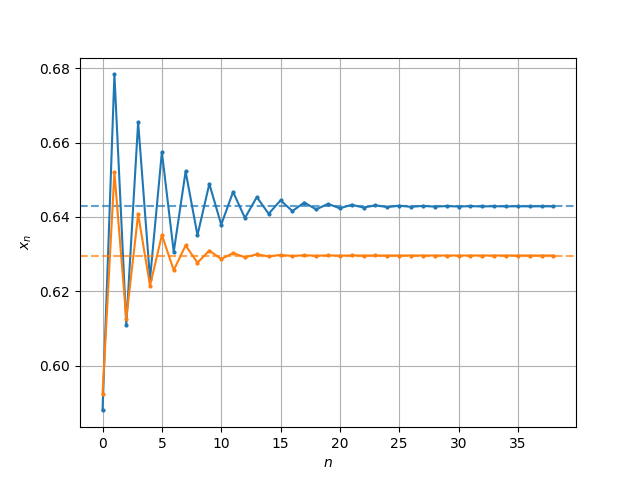

In [82]:
%matplotlib widget

def printConvergenceMaps(data, threshold=1e-16,cycle_count = 4,ignore = 0.05):
    maps = [logisticMap(i,j,k, threshold,cycle_count, store_points=True) for i,j,k in data]
    
    fig = plt.figure()

    for map in maps:
        #line, = plt.plot(list(range(map.iterations)),map.points, label = f'{map.r }{np.around(map.x0,3)}', marker = '.',markersize = 2)
        line, = plt.plot(map.points[int(ignore*map.iterations):], label = f'{map.r }{np.around(map.x0,3)}', marker = '.',markersize = 4)
        plt.axhline(map.theoretical,linestyle = "--",color = line.get_color(),alpha = 0.7)

    plt.grid()
    #plt.legend(title = "r Values",alignment = 'right')
    plt.xlabel("$n$")
    plt.ylabel("$x_{n}$")

    return fig

plt.close('all')

f1 = printConvergenceMaps(data = [(0.5,2.8,40),(0.5,2.7,40)])
plt.show()

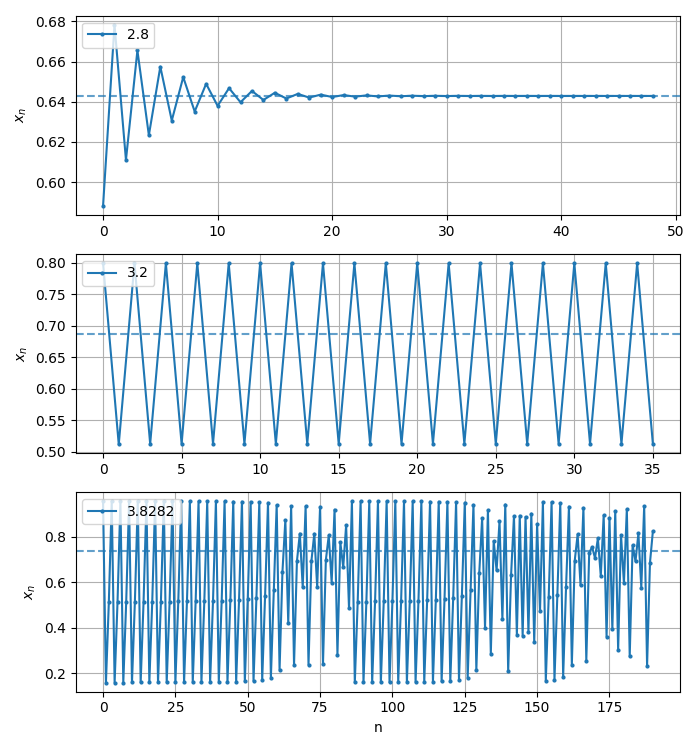

In [86]:
def printConvergenceMapsGPT(config_list):
    """
    Plot logistic map convergence from a list of config dictionaries.
    Only the provided fields override defaults.

    config_list : list of dicts
        Each dict may contain any subset of:
        - x0, r, iterations, threshold, cycle_count, ignore
    """
    DEFAULTS = {
        "x0": 0.5,
        "r": 3.0,
        "iterations": 50,
        "threshold": 1e-16,
        "cycle_count": 2,
        "ignore": 0.05
    }
    # ----- Normalize each config dict with defaults -----
    normalized = []
    for cfg in config_list:
        full_cfg = DEFAULTS.copy()
        full_cfg.update(cfg)
        normalized.append(full_cfg)

    # ----- Generate maps -----
    maps = [
        logisticMap(
            cfg["x0"],
            cfg["r"],
            cfg["iterations"],
            cfg["threshold"],
            cfg["cycle_count"],
            store_points=True
        )
        for cfg in normalized
    ]

    n = len(maps)
    fig, axes = plt.subplots(n, 1, figsize=(7, 2.5*n))
    if n == 1:
        axes = [axes]

    # ----- Plot -----
    for ax, cfg, m in zip(axes, normalized, maps):

        pts = m.points[int(cfg["ignore"] * m.iterations):]

        line, = ax.plot(
            pts,
            marker=".",
            markersize=4,     # fixed (no parameter)
            label = m.r
        )

        ax.axhline(
            m.theoretical,
            linestyle="--",
            color=line.get_color(),
            alpha=0.7
        )

        ax.legend(loc = "upper left");
        ax.set_ylabel("$x_n$")
        ax.grid(True)
        
    axes[-1].set_xlabel("n")
    fig.tight_layout()

    return fig, axes

plt.close('all')

printConvergenceMapsGPT([
    {"r": 2.8},
    {"r": 3.2},
    {"r": 3.8282, "iterations": 200}
])
plt.show()

In [7]:
def bifurcationData(R = (2,3.5,100),max_iterations=1000, threshold=1e-6):
    count = 2
    lmaps = []
    R = np.linspace(*R)
    for r in R:
        lmaps.append(logisticMap(0.4,r,max_iterations,threshold))
   
    print("CALCULATED")

    X0,R_all,periodic = [],[],[]
    for r,map in zip(R,lmaps):
        #print(len(map.x0))
        X0.extend(map.x0)
        R_all.extend(*[np.ones(abs(map.cycle)) * r])
        periodic.extend(['black' if(map.cycle > 0) else 'red']*abs(map.cycle))

    #fig,ax = plt.subplots()

    #ax.scatter(R_all,X0,s = 0.1,c = periodic)

    return R_all, X0, periodic

def plotBifurcations(param_list):
    """
    param_list: list of dictionaries
        Each dict contains keys: 'R', 'max_iterations', 'threshold', 'title' (optional)
        Example: {'R':(2,4,1000), 'max_iterations':1200, 'threshold':1e-16, 'title':'Plot 1'}
    """
    num_plots = len(param_list)
    fig, axs = plt.subplots(num_plots,1,figsize = (9,5*num_plots),squeeze=False)
    
    for i, params in enumerate(param_list):
        R_all, X0, periodic = bifurcationData(
            R=params.get('R'),
            max_iterations=params.get('max_iterations'),
            threshold=params.get('threshold')
        )
        axs[i,0].scatter(R_all, X0, s=0.1, c=periodic)
        axs[i,0].set_title(params.get('title', f'Bifurcation {i+1}'))
        axs[i,0].set_xlabel('R')
        axs[i,0].set_ylabel('X0')
        

    plt.tight_layout()
    plt.show()
    return fig, axs

CALCULATED
CALCULATED
CALCULATED


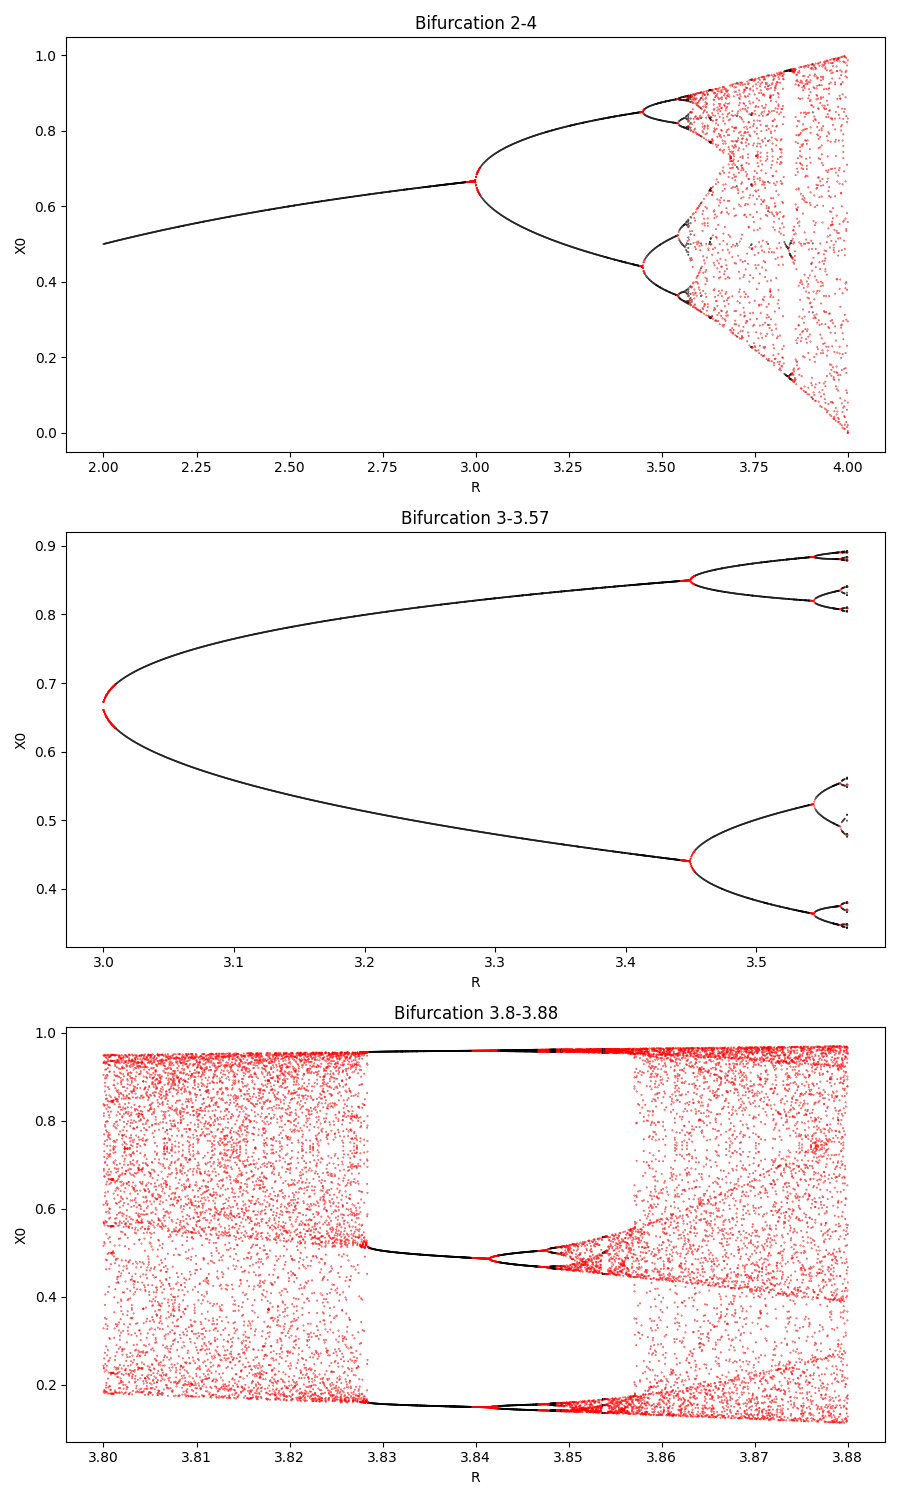

In [8]:
#fig1,ax1 = bifurcationPlot(R = (2,4,1000),max_iterations=1200, threshold=1e-16)
#fig2,ax2 = bifurcationPlot(R = (3,3.57,1000),max_iterations=1500, threshold=1e-16)
#fig3,ax3 = bifurcationPlot(R = (3.8,3.88,1000),max_iterations=1500, threshold=1e-16)
%matplotlib widget
plt.close('all')
param_list = [
    {'R': (2, 4, 1000), 'max_iterations': 1200, 'threshold': 1e-16, 'title': 'Bifurcation 2-4'},
    {'R': (3, 3.57, 1000), 'max_iterations': 1500, 'threshold': 1e-16, 'title': 'Bifurcation 3-3.57'},
    {'R': (3.8, 3.88, 2000), 'max_iterations': 500, 'threshold': 1e-16, 'title': 'Bifurcation 3.8-3.88'}
]

fig, axs = plotBifurcations(param_list)

In [9]:
def feigenbaum():
    findingCycle = 2
    R = np.linspace(2.5,3.58,5000)
    max_interations = 2000
    threshold = 1e-10
    a,maps = [],[]
    
    for r in R:
        maps.append(logisticMap(x0 = 0.4, r = r,max_iterations=max_interations, threshold=threshold))
        if(maps[-1].cycle == findingCycle):
            findingCycle *= 2
            a.append(maps[-2].r)
            if(findingCycle == 256):
                a.append(maps[-1].r)
                return a
    return a

In [10]:
a = np.array(feigenbaum())

In [11]:
a
#array([2.50129626, 3.29331066, 3.53506301, 3.56336467, 3.56854971,3.56962993])

array([2.50108022, 3.29309462, 3.53484697, 3.56314863, 3.56833367,
       3.56941388])

In [12]:
a_ = a[2:]
a_1 = a[1:-1]
a_2 = a[:-2]

num = a_1 - a_2
den = a_ - a_1

estimate = np.divide(num,den)
estimate

array([3.27613941, 8.54198474, 5.45833333, 4.79999974])

In [13]:
f = 4.6768

abs(f - estimate[-1])*100/f

np.float64(2.634274307051272)